# Cluster Labels as a Feature #

Applied to a single real-valued feature, clustering acts like a traditional "binning" or ["discretization"](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html) transform. On multiple features, it's like "multi-dimensional binning" (sometimes called *vector quantization*).

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/sr3pdYI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Clustering a single feature. <strong>Right:</strong> Clustering across two features.
</center></figcaption>
</figure>

Added to a dataframe, a feature of cluster labels might look like this:

| Longitude | Latitude | Cluster |
|-----------|----------|---------|
| -93.619   | 42.054   | 3       |
| -93.619   | 42.053   | 3       |
| -93.638   | 42.060   | 1       |
| -93.602   | 41.988   | 0       |

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("../input/fe-course-data/housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

In [2]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

MedInc  Latitude  Longitude Cluster
0  8.3252     37.88    -122.23       5
1  8.3014     37.86    -122.22       5
2  7.2574     37.85    -122.24       5
3  5.6431     37.85    -122.25       5
4  3.8462     37.85    -122.25       1

Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

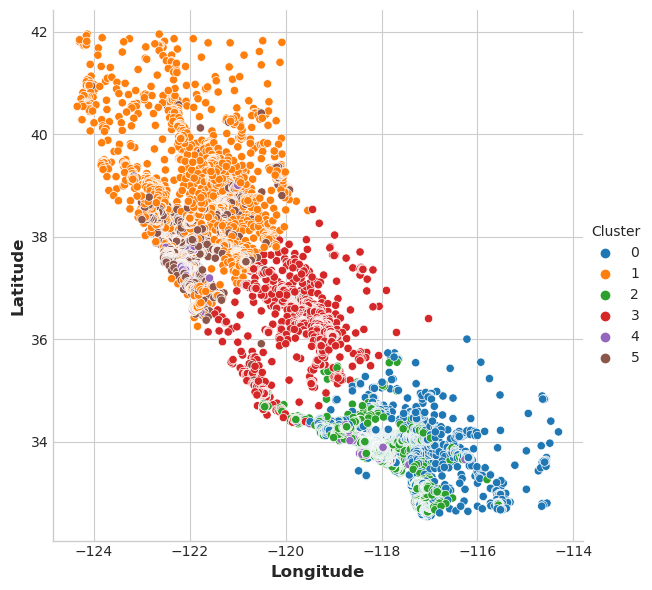

In [3]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
);

The target in this dataset is `MedHouseVal` (median house value). These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across `MedHouseVal`, which is indeed what we see.

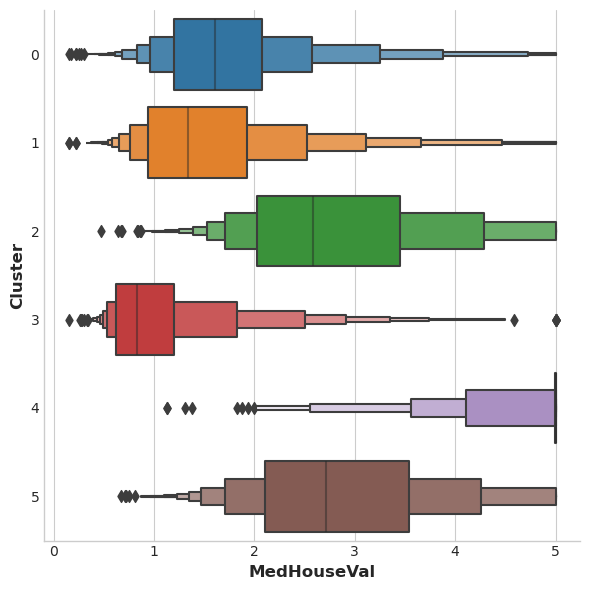

In [4]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);